# Random Forest Model

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score

from sklearn.metrics import classification_report

In [12]:
df = pd.read_csv("atmospheric_weather_preprocessed.csv")
df

,temperature,humidity,pressure,image
0,209.477417,3.186864,18499.99771,0
1,209.747436,3.067529,18499.99771,0
2,210.730987,2.938781,26399.99924,0
3,211.201355,2.554327,39799.99924,0
4,210.796722,2.694520,38599.99771,0
...,...,...,...,...
2670,211.433670,2.078789,19199.99771,0
2671,210.902908,2.221609,18999.99771,0
2672,210.801193,2.425274,20499.99771,0
2673,210.243073,2.450494,21899.99771,0


In [40]:
df.temperature.mean()

209.0900773500561

In [26]:
# Split the dataset into predictors (X) and the target variable (y)
X = df.drop("image", axis=1)
y = df["image"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [27]:
# Define the parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 5, 10],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


In [28]:
# Perform grid search cross-validation for parameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameter values
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.6450809464508095


In [ ]:
# Define the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6550435865504358
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       434
           1       0.63      0.61      0.62       369

    accuracy                           0.66       803
   macro avg       0.65      0.65      0.65       803
weighted avg       0.65      0.66      0.65       803

ROC AUC Score: 0.6518551821462915


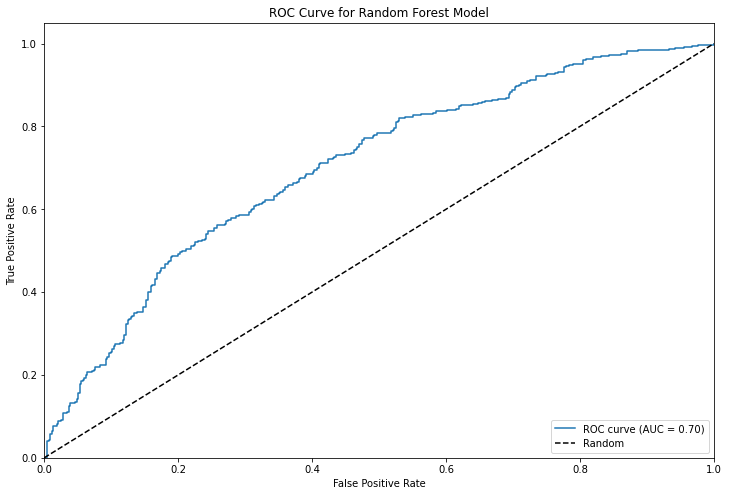

In [38]:
# Calculate the predicted probabilities for class 1
probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()